#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

##### Below are the steps to be followed
1. Reading, understanding and visualizing the data

2. Preparing the data for model training (train-test split, rescaling)

3. Training the model

4. Residual analysis

5. Prediction and evaluation of the test set

In [67]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [68]:
# reading the dataset
bikes = pd.read_csv("day.csv")

In [69]:
# checking the data
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
# checking the shape of dataset
bikes.shape

(730, 16)

In [71]:
# checking the info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [72]:
# checking the description of dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [73]:
# checking the dataset for null values
bikes.isnull().sum()

# Null values are not present

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [74]:
# dropping variables
bikes.drop(['instant','dteday'],axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


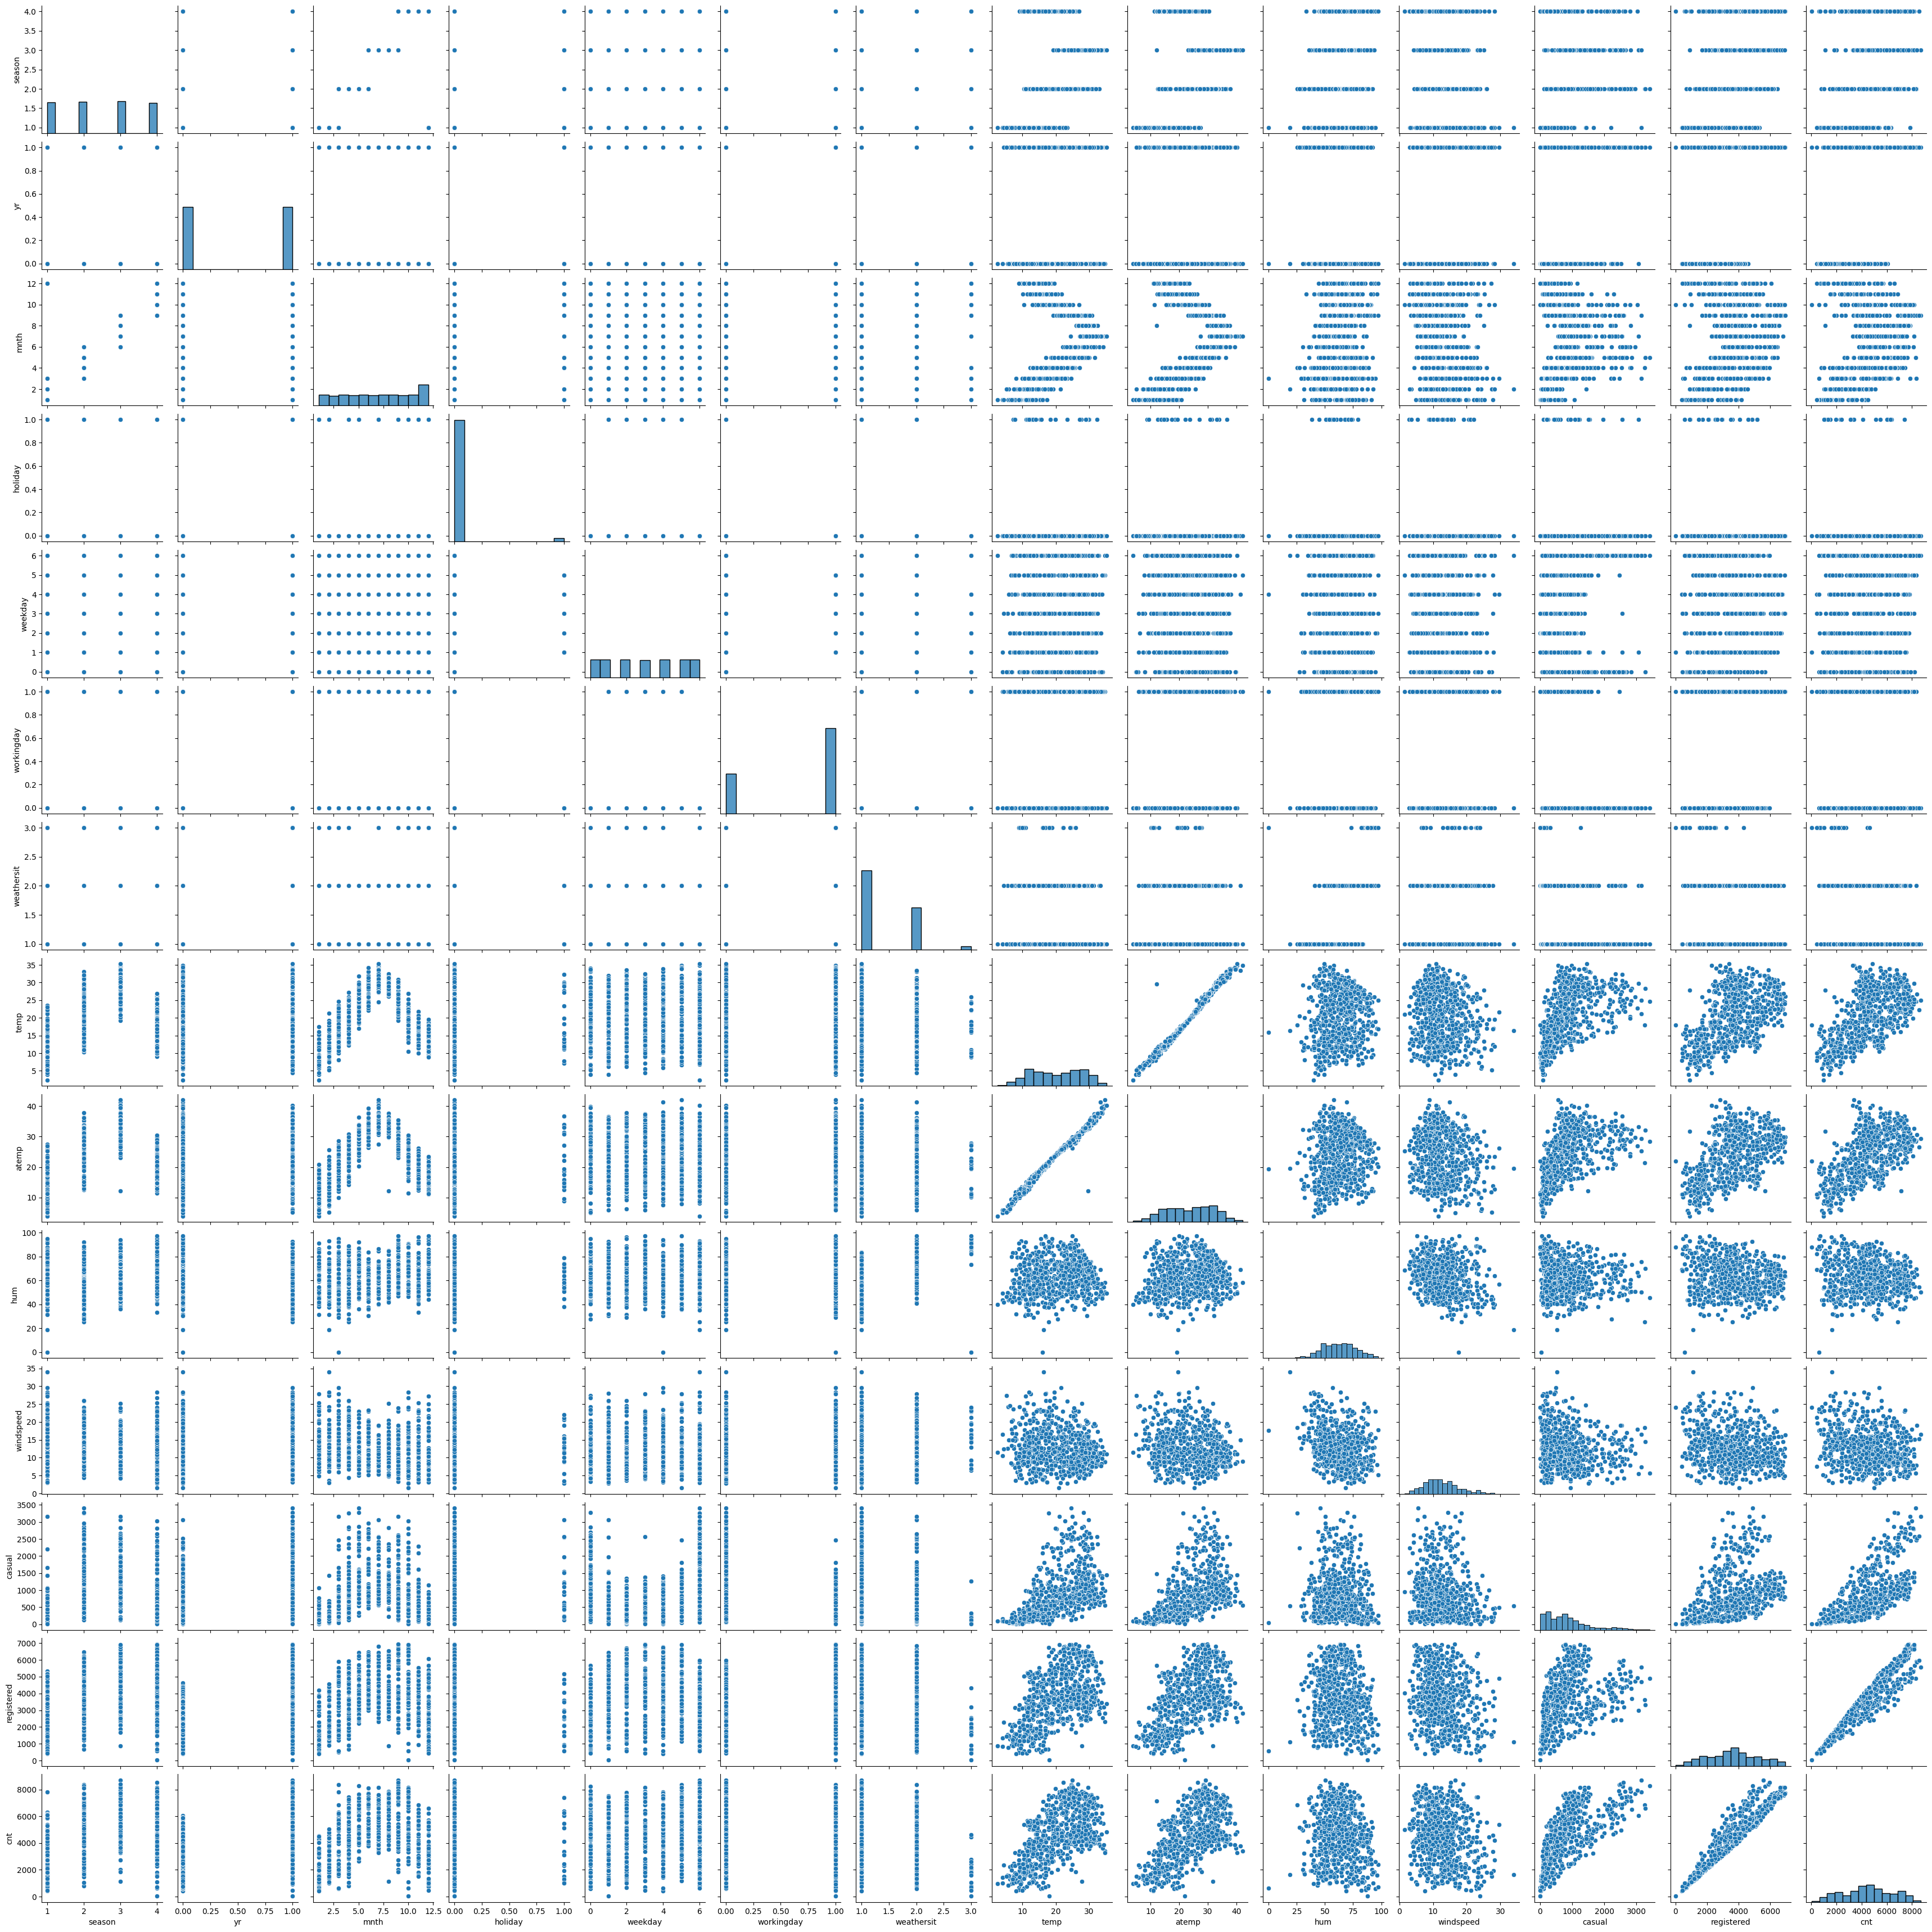

In [75]:
# Visualising the data
sns.pairplot(bikes)

In [76]:
# Encoding the variables
bikes['season'] = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['mnth'] = bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weekday'] = bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bikes['yr'] = bikes.yr.map({0: 2018, 1:2019})
bikes['workingday'] = bikes.workingday.map({1:'workingday', 0:'weekendorholiday'})
bikes['weathersit'] = bikes.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

#### Visualizing data using barplot

<Axes: xlabel='season', ylabel='cnt'>

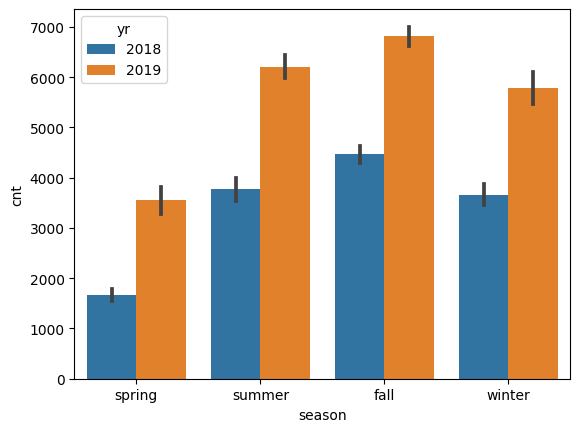

In [77]:
# plotting barplot
sns.barplot(data= bikes, x = 'season', y = 'cnt', hue='yr')

##### Boom bike rent is highest in fall season

<Axes: xlabel='mnth', ylabel='cnt'>

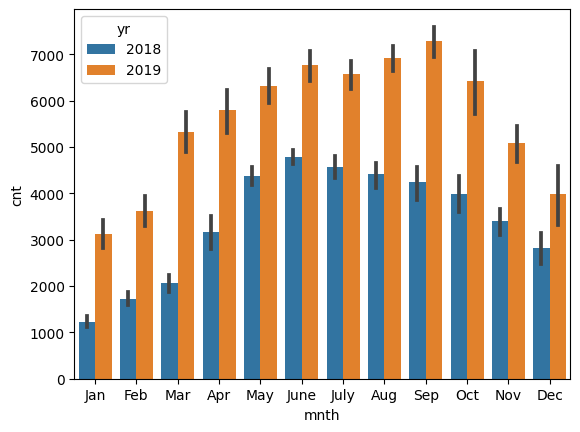

In [78]:
# plotting barplot
sns.barplot(data= bikes, x = 'mnth', y = 'cnt', hue='yr')

##### Number of rented bikes increases from the month of Jan to Sep and then it decreases

<Axes: xlabel='weekday', ylabel='cnt'>

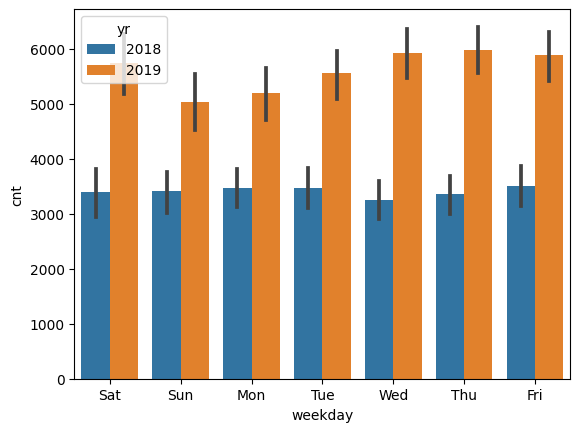

In [79]:
# plotting barplot
sns.barplot(data= bikes, x = 'weekday', y = 'cnt', hue='yr')

##### There is no significant difference in number of rented bikes on weekdays and weekends

<Axes: xlabel='yr', ylabel='cnt'>

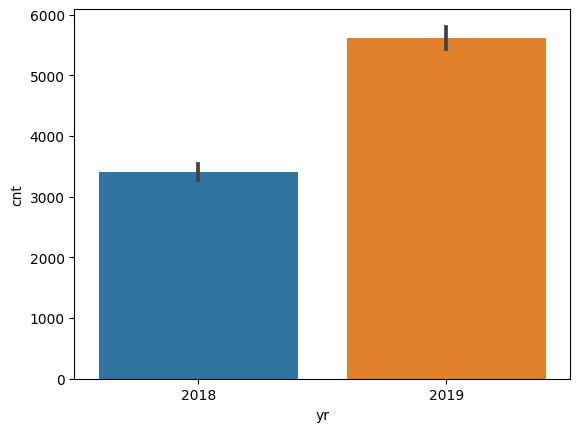

In [80]:
# plotting barplot
sns.barplot(data= bikes, x = 'yr', y = 'cnt')

##### Rented bike counts is more in 2019

<Axes: xlabel='workingday', ylabel='cnt'>

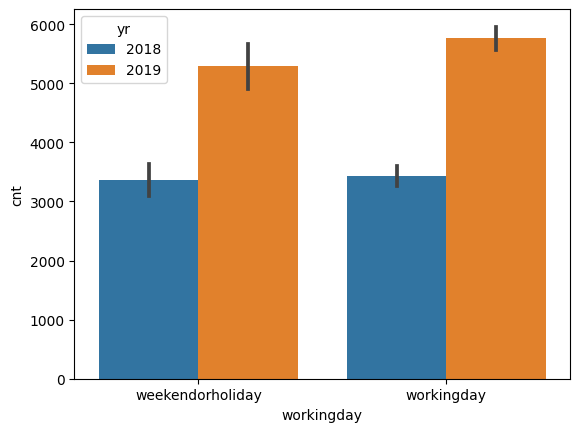

In [81]:
# plotting barplot
sns.barplot(data= bikes, x = 'workingday', y = 'cnt', hue='yr')

##### There is no significant difference in the count of rented bikes on weekend or holiday and workin day

<Axes: xlabel='weathersit', ylabel='cnt'>

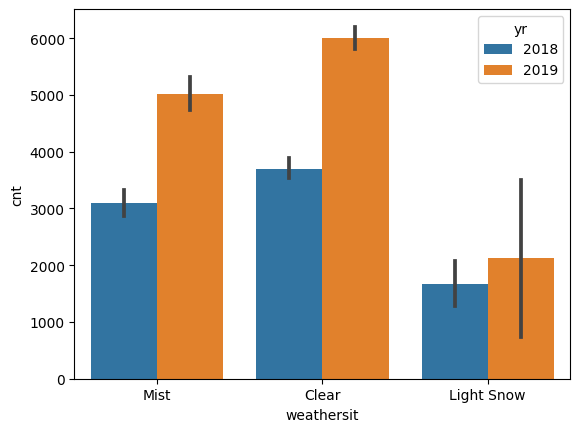

In [82]:
# plotting barplot
sns.barplot(data= bikes, x = 'weathersit', y = 'cnt', hue='yr')

<Axes: xlabel='weathersit', ylabel='cnt'>

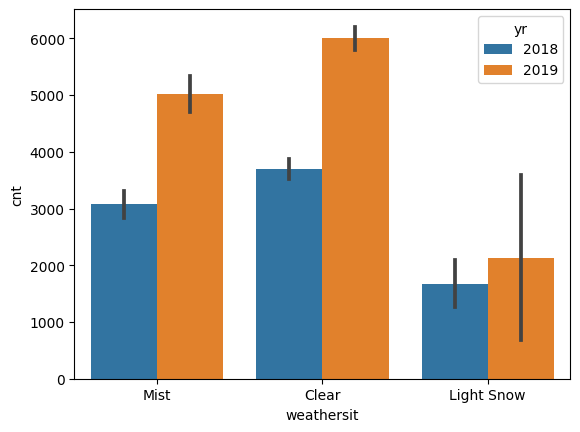

In [83]:
# plotting barplot
sns.barplot(data= bikes, x = 'weathersit', y = 'cnt', hue='yr')

##### Most number of bikes are rented on clear weather

<Axes: xlabel='weathersit', ylabel='cnt'>

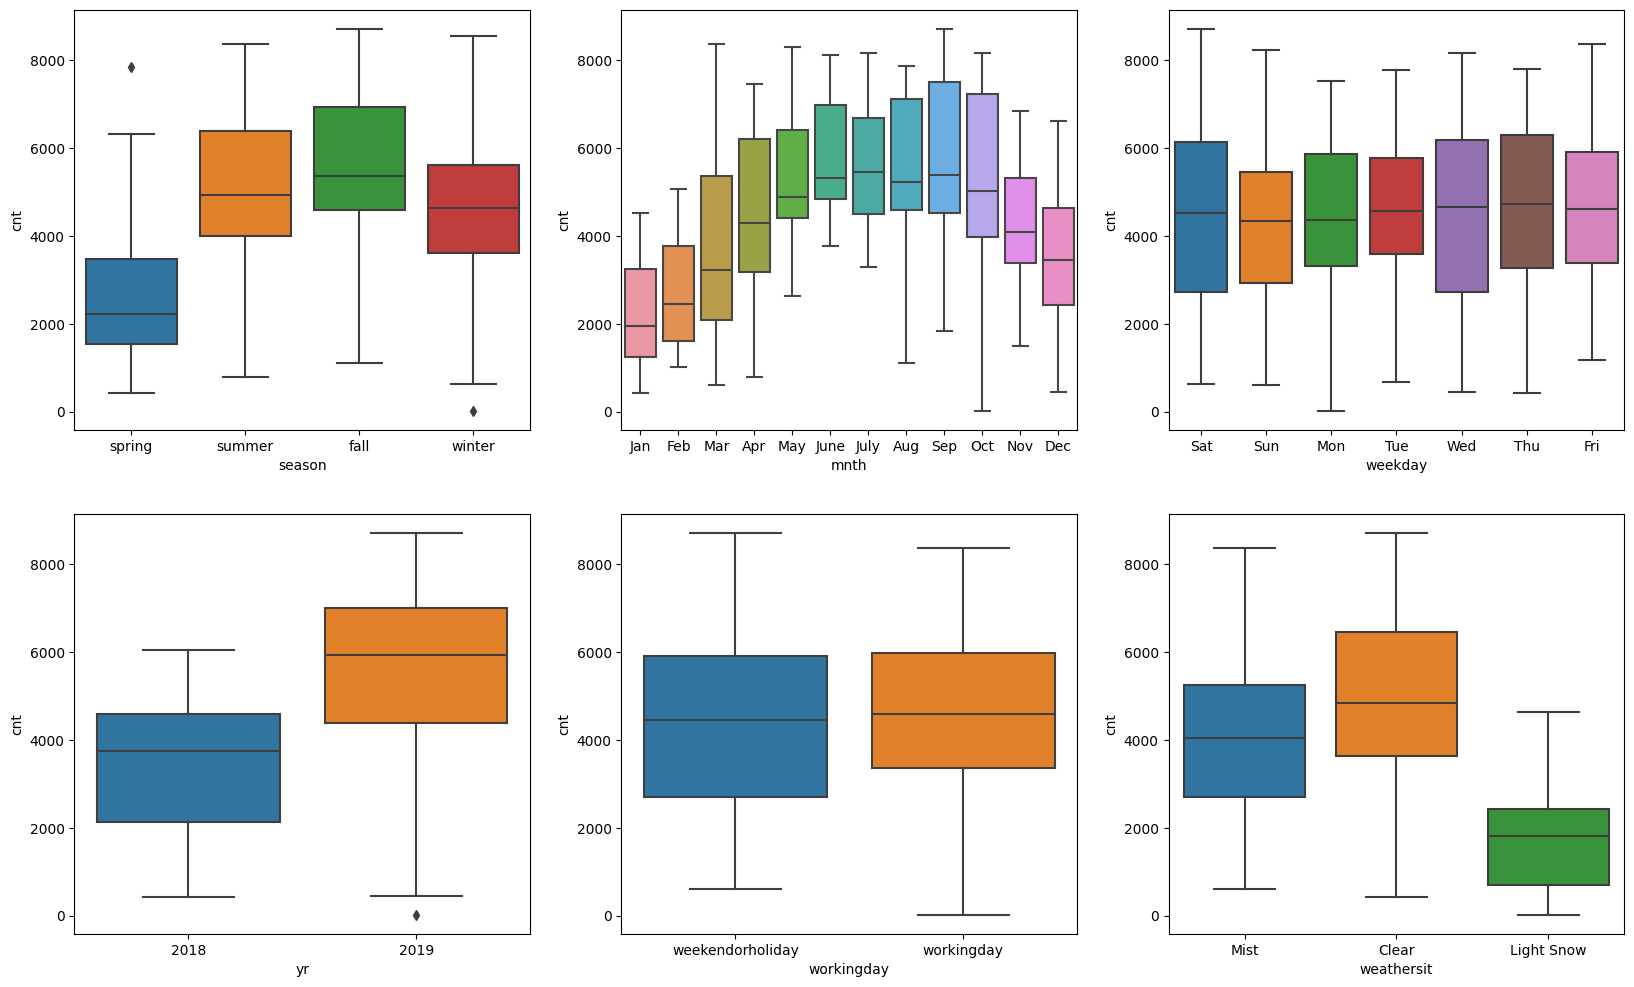

In [84]:
# plotting boxplot
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot (x='season', y='cnt',data= bikes)
plt.subplot(2,3,2)
sns.boxplot (x='mnth', y='cnt',data= bikes)
plt.subplot(2,3,3)
sns.boxplot (x='weekday', y='cnt',data= bikes)
plt.subplot(2,3,4)
sns.boxplot (x='yr', y='cnt',data= bikes)
plt.subplot(2,3,5)
sns.boxplot (x='workingday', y='cnt',data= bikes)
plt.subplot(2,3,6)
sns.boxplot (x='weathersit', y='cnt',data= bikes)

<Axes: >

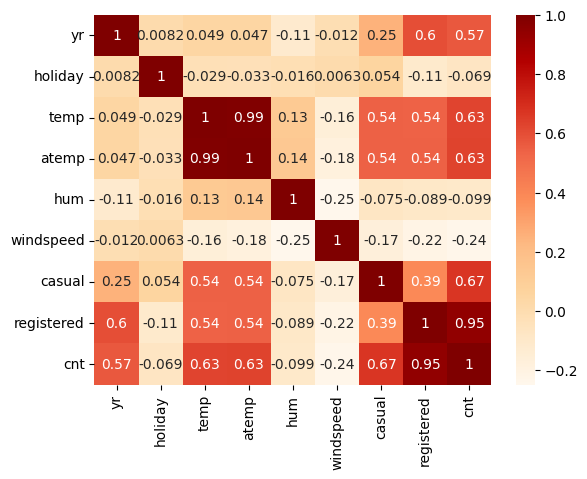

In [86]:
# Identifying numeric variable from dataset
bikes_num = bikes[['yr','holiday','temp','atemp','hum','windspeed','casual','registered','cnt']]

# plotting heatmap to check the correlation between variables
sns.heatmap(bikes_num.corr(),cmap='OrRd',annot=True)

In [87]:
# 'atemp' and temp are highly correlated so dropping one to avoid multicollinearity
# dropping 'registered' and 'casual' (redundant column) as cnt columns is the summation of registered and casual
bikes = bikes.drop(['atemp','registered','casual'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,weekendorholiday,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,weekendorholiday,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,workingday,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,workingday,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,workingday,Clear,9.305237,43.6957,12.522300,1600


In [89]:
# Identifying categorical variable from dataset
bikes_categorical = bikes[['season','mnth','weekday','workingday','weathersit']]
bikes_categorical.head()

,season,mnth,weekday,workingday,weathersit
0,spring,Jan,Sat,weekendorholiday,Mist
1,spring,Jan,Sun,weekendorholiday,Mist
2,spring,Jan,Mon,workingday,Clear
3,spring,Jan,Tue,workingday,Clear
4,spring,Jan,Wed,workingday,Clear


In [91]:
# Creating dummy variables for season, mnth, weekday, workingday, weathersit
bikes_dummies = pd.get_dummies(bikes_categorical, drop_first= True, dtype=int)
bikes_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [92]:
# Adding the dummy variables to the original dataframe
bikes = pd.concat([bikes, bikes_dummies], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist
0,spring,2018,Jan,0,Sat,weekendorholiday,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,2018,Jan,0,Sun,weekendorholiday,Mist,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,0,1
2,spring,2018,Jan,0,Mon,workingday,Clear,8.050924,43.7273,16.636703,...,0,1,0,0,0,0,0,1,0,0
3,spring,2018,Jan,0,Tue,workingday,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,1,0,0
4,spring,2018,Jan,0,Wed,workingday,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,1,0,0


In [93]:
# Dropping the variables season, mnth, weekday, workingday, weathersit as we have created dummy variables for them
bikes = bikes.drop(list(bikes_categorical.columns), axis=1)
bikes.head()

,yr,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist
0,2018,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2018,0,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2018,0,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2018,0,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [95]:
# Checking the info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   temp                   730 non-null    float64
 3   hum                    730 non-null    float64
 4   windspeed              730 non-null    float64
 5   cnt                    730 non-null    int64  
 6   season_spring          730 non-null    int32  
 7   season_summer          730 non-null    int32  
 8   season_winter          730 non-null    int32  
 9   mnth_Aug               730 non-null    int32  
 10  mnth_Dec               730 non-null    int32  
 11  mnth_Feb               730 non-null    int32  
 12  mnth_Jan               730 non-null    int32  
 13  mnth_July              730 non-null    int32  
 14  mnth_June              730 non-null    int32  
 15  mnth_M

Text(0.5, 1.0, 'Correlation between new variables')

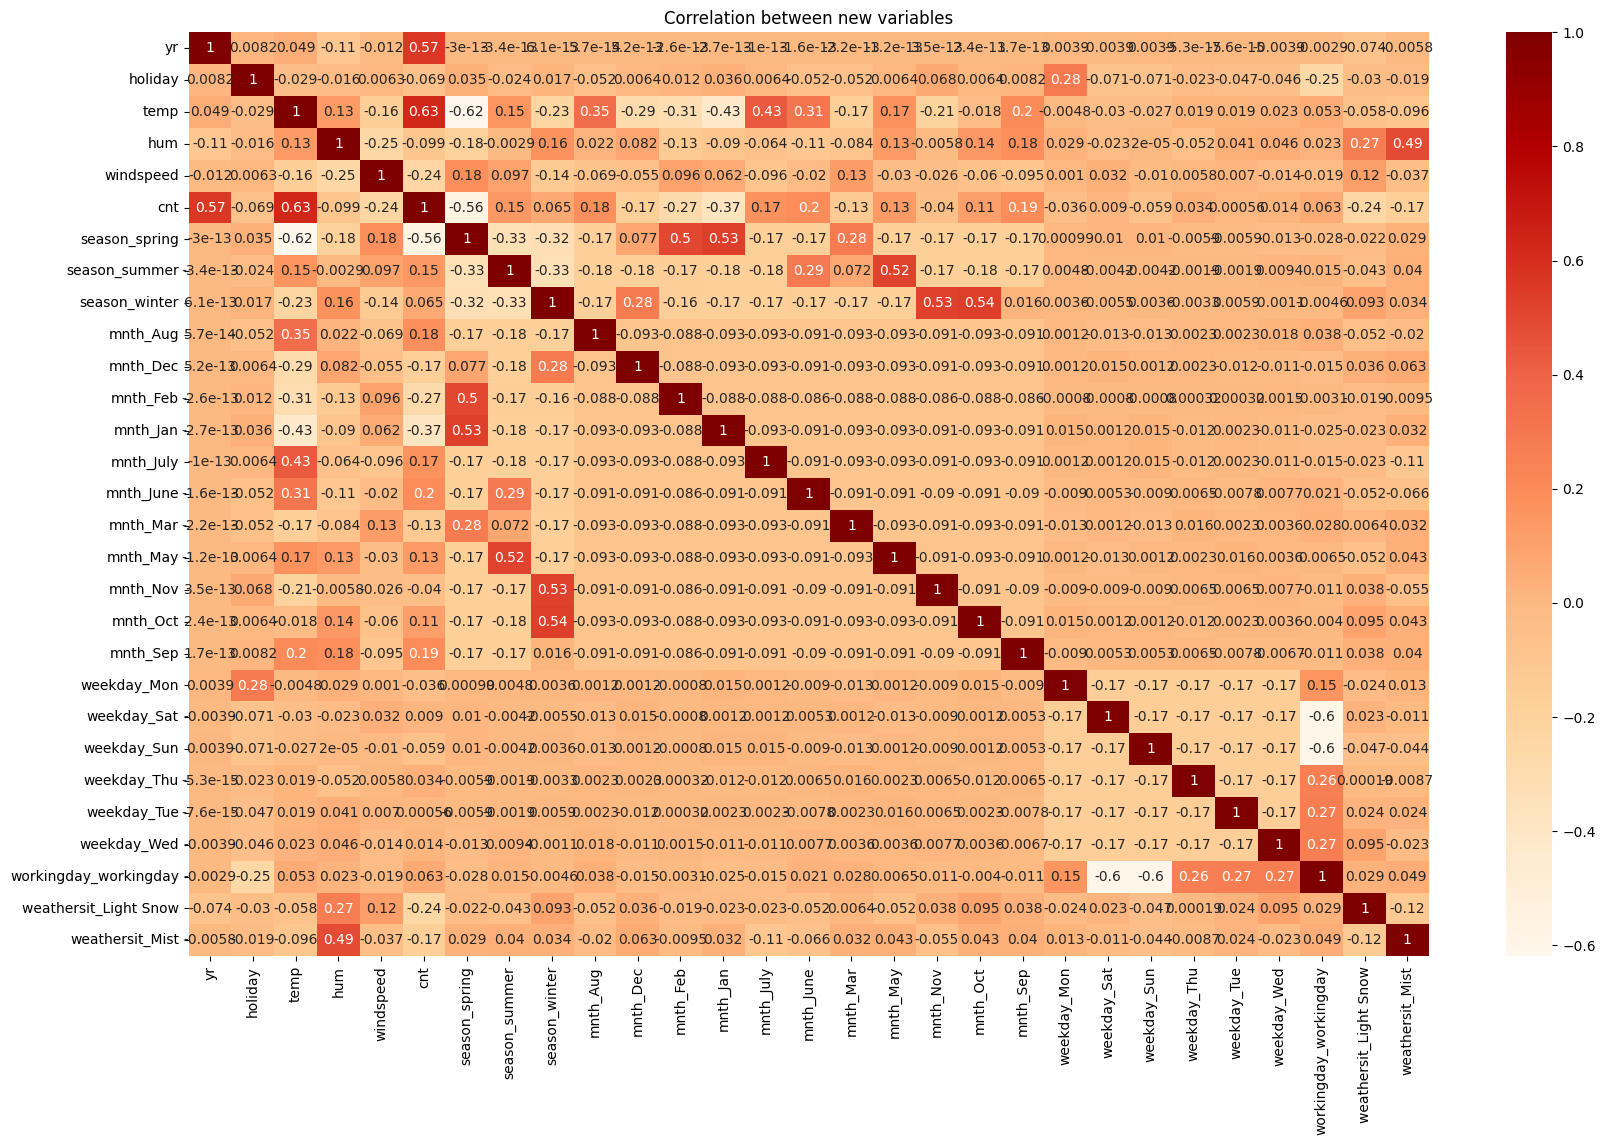

In [98]:
# Plotting heatmap to check the correlation between new variables
plt.figure(figsize=(20,12))
sns.heatmap(bikes.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between new variables')

##### Preparing the data for model training

In [99]:
# Splitting the Data into Training and Testing Sets
df_train, df_test = train_test_split(bikes, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
# Checking the shape of training set
df_train.shape

(510, 29)

In [101]:
# Checking the shape of test set
df_train.shape

(510, 29)

##### Scaling the variables using MinMax scaling

In [103]:
# Scaling the variables temp, hum, windspeed and cnt as they have large values compared to others
scaler = MinMaxScaler()
scaler_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist
653,2019,0,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
576,2019,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,2019,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,2019,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,2019,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [105]:
# Checking the description of train set after scaling
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_workingday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.507843,0.025490,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.676471,0.029412,0.343137
std,0.500429,0.157763,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.169124,0.475223
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,0.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
